#### Overview
* Feature(Key) Join
* Spatial Join

#### Import Libraries

In [48]:
import os
import pandas as pd
import geopandas as gpd

import folium
from folium import plugins as fp
import matplotlib.pyplot as plt

#### Fetching Data

* Urban Park Info

In [5]:
SRC_PARK_PATH = os.path.join(os.getcwd(), '89_data', 'csv', 'urban_park_info.csv')
park_df = pd.read_csv(SRC_PARK_PATH, encoding='cp949')
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18146 entries, 0 to 18145
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18146 non-null  object 
 1   공원명           18146 non-null  object 
 2   공원구분          18146 non-null  object 
 3   소재지도로명주소      6476 non-null   object 
 4   소재지지번주소       17340 non-null  object 
 5   위도            17803 non-null  float64
 6   경도            17800 non-null  float64
 7   공원면적          18146 non-null  float64
 8   공원보유시설(운동시설)  4941 non-null   object 
 9   공원보유시설(유희시설)  6627 non-null   object 
 10  공원보유시설(편익시설)  5307 non-null   object 
 11  공원보유시설(교양시설)  1117 non-null   object 
 12  공원보유시설(기타시설)  2947 non-null   object 
 13  지정고시일         15544 non-null  object 
 14  관리기관명         16998 non-null  object 
 15  전화번호          16609 non-null  object 
 16  데이터기준일자       18146 non-null  object 
 17  제공기관코드        18146 non-null  object 
 18  제공기관명         18146 non-nu

In [7]:
park_df.공원구분.unique()

array(['어린이공원', '근린공원', '소공원', '문화공원', '역사공원', '수변공원', '체육공원', '묘지공원',
       '기타', '도시농업공원', '기타공원', '주제공원', '도시자연공원', '도시자연공원구역', '가로공원'],
      dtype=object)

* SiGunGu Info
  * 파일명에 'SGG_11'에서 '11'은 서울을 의미함.
  * 따라서 Join할 때 서울 이외의 공원등은 다 무시됨

In [8]:
SRC_SGG_PATH = os.path.join(os.getcwd(), '89_data', 'shp', 'LARD_ADM_SECT_SGG_11.shp')
sgg_gdf = gpd.read_file(SRC_SGG_PATH, encoding='cp949')
sgg_gdf.crs

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
sgg_gdf.head()

ADM_SECT_C SGG_NM  SGG_OID COL_ADM_SE  GID  \
0      11740    강동구      337      11740  127   
1      11710    송파구     1969      11710  128   
2      11680    강남구       33      11680  129   
3      11650    서초구       33      11650  130   
4      11620    관악구       33      11620  131   

                                            geometry  
0  POLYGON ((969713.132 1948846.288, 969692.451 1...  
1  POLYGON ((968640.372 1944982.492, 968640.957 1...  
2  POLYGON ((958696.114 1948605.678, 959195.920 1...  
3  POLYGON ((958117.753 1940073.855, 958118.398 1...  
4  POLYGON ((949321.250 1944035.054, 949323.256 1...

In [16]:
sgg_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM_SECT_C  25 non-null     object  
 1   SGG_NM      25 non-null     object  
 2   SGG_OID     25 non-null     int64   
 3   COL_ADM_SE  25 non-null     object  
 4   GID         25 non-null     int64   
 5   geometry    25 non-null     geometry
dtypes: geometry(1), int64(2), object(3)
memory usage: 1.3+ KB


* Festival Info

In [9]:
SRC_FESTIVAL_PATH = os.path.join(os.getcwd(), '89_data', 'shp', 'festival_pt4326.shp')
festival_gdf = gpd.read_file(SRC_FESTIVAL_PATH, encoding='cp949')
festival_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
festival_gdf.head()

name organizati                    geometry
0  [SEMI 예천곤충엑스포] 2022예천곤충축제   경상북도 예천군  POINT (128.45865 36.82444)
1                     용궁순대축제   경상북도 예천군  POINT (128.27690 36.60630)
2                  삼강주막나루터축제   경상북도 예천군  POINT (128.29930 36.56389)
3                 예천장터농산물대축제   경상북도 예천군  POINT (128.44921 36.64810)
4                     봉화은어축제   경상북도 봉화군  POINT (128.73783 36.88888)

In [17]:
festival_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        909 non-null    object  
 1   organizati  909 non-null    object  
 2   geometry    909 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 21.4+ KB


#### Feature Join
* `key`값을 이용한 연결방법
* `도시공원 데이터`의 `도시공원관리번호` 앞 5자리가 시군구코드이며, `시군구데이터`의 `COL_ADM_SE`와 같은 값임

In [10]:
park_df.관리번호.str.slice(start=0, stop=5)[:3]

0    29200
1    29200
2    29200
Name: 관리번호, dtype: object

In [11]:
sgg_gdf.COL_ADM_SE[:3]

0    11740
1    11710
2    11680
Name: COL_ADM_SE, dtype: object

* Create Join Key

In [13]:
park_df['sgg_cd'] = park_df.관리번호.str.slice(start=0, stop=5)
park_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18146 entries, 0 to 18145
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18146 non-null  object 
 1   공원명           18146 non-null  object 
 2   공원구분          18146 non-null  object 
 3   소재지도로명주소      6476 non-null   object 
 4   소재지지번주소       17340 non-null  object 
 5   위도            17803 non-null  float64
 6   경도            17800 non-null  float64
 7   공원면적          18146 non-null  float64
 8   공원보유시설(운동시설)  4941 non-null   object 
 9   공원보유시설(유희시설)  6627 non-null   object 
 10  공원보유시설(편익시설)  5307 non-null   object 
 11  공원보유시설(교양시설)  1117 non-null   object 
 12  공원보유시설(기타시설)  2947 non-null   object 
 13  지정고시일         15544 non-null  object 
 14  관리기관명         16998 non-null  object 
 15  전화번호          16609 non-null  object 
 16  데이터기준일자       18146 non-null  object 
 17  제공기관코드        18146 non-null  object 
 18  제공기관명         18146 non-nu

* Join

In [22]:
sgg_gdf.COL_ADM_SE.unique().size

25

In [23]:
park_df.sgg_cd.unique().size

248

In [20]:
join_sgg_park_gdf = pd.merge(sgg_gdf, park_df, left_on='COL_ADM_SE', right_on='sgg_cd', how='left')

In [27]:
sgg_gdf.shape, park_df.shape

((25, 6), (18146, 20))

In [21]:
join_sgg_park_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ADM_SECT_C    1871 non-null   object  
 1   SGG_NM        1871 non-null   object  
 2   SGG_OID       1871 non-null   int64   
 3   COL_ADM_SE    1871 non-null   object  
 4   GID           1871 non-null   int64   
 5   geometry      1871 non-null   geometry
 6   관리번호          1871 non-null   object  
 7   공원명           1871 non-null   object  
 8   공원구분          1871 non-null   object  
 9   소재지도로명주소      509 non-null    object  
 10  소재지지번주소       1853 non-null   object  
 11  위도            1801 non-null   float64 
 12  경도            1798 non-null   float64 
 13  공원면적          1871 non-null   float64 
 14  공원보유시설(운동시설)  453 non-null    object  
 15  공원보유시설(유희시설)  618 non-null    object  
 16  공원보유시설(편익시설)  567 non-null    object  
 17  공원보유시설(교양시설)  89 non-null     object  
 18  

In [31]:
join_sgg_park_gdf.shape

(1871, 26)

In [33]:
join_sgg_park_gdf.sgg_cd.unique().size

25

In [34]:
join_sgg_park_gdf.COL_ADM_SE.unique().size

25

In [32]:
join_sgg_park_gdf.iloc[100:102]

ADM_SECT_C SGG_NM  SGG_OID COL_ADM_SE  GID  \
100      11710    송파구     1969      11710  128   
101      11710    송파구     1969      11710  128   

                                              geometry         관리번호      공원명  \
100  POLYGON ((968640.372 1944982.492, 968640.957 1...  11710-00126  돌무데기놀이터   
101  POLYGON ((968640.372 1944982.492, 968640.957 1...  11710-00127    풍납타이어   

    공원구분 소재지도로명주소  ... 공원보유시설(편익시설)  공원보유시설(교양시설)  공원보유시설(기타시설)  지정고시일  \
100   기타      NaN  ...          NaN           NaN           NaN    NaN   
101   기타      NaN  ...          NaN           NaN           NaN    NaN   

          관리기관명          전화번호     데이터기준일자   제공기관코드      제공기관명 sgg_cd  
100  서울특별시 송파구청  02-2147-3380  2021-02-21  3230000  서울특별시 송파구  11710  
101  서울특별시 송파구청  02-2147-3380  2021-02-21  3230000  서울특별시 송파구  11710  

[2 rows x 26 columns]

* Counting the Number of Parks in SiGunGu

In [35]:
sgg_park_counts_df = join_sgg_park_gdf.sgg_cd.value_counts().reset_index()
sgg_park_counts_df

sgg_cd  count
0   11350    169
1   11710    159
2   11500    139
3   11680    134
4   11650    114
5   11380    101
6   11470     96
7   11440     84
8   11620     76
9   11740     74
10  11320     71
11  11410     55
12  11260     54
13  11290     53
14  11590     52
15  11545     51
16  11530     49
17  11200     48
18  11305     45
19  11560     44
20  11230     44
21  11170     44
22  11215     40
23  11110     40
24  11140     35

* Join SiGunGu and Number of Park Counts

In [36]:
join_sgg_park_cnt_gdf = pd.merge(sgg_gdf, sgg_park_counts_df, left_on='COL_ADM_SE', right_on='sgg_cd', how='left')
join_sgg_park_cnt_gdf.shape

(25, 8)

In [37]:
join_sgg_park_cnt_gdf

ADM_SECT_C  SGG_NM  SGG_OID COL_ADM_SE  GID  \
0       11740     강동구      337      11740  127   
1       11710     송파구     1969      11710  128   
2       11680     강남구       33      11680  129   
3       11650     서초구       33      11650  130   
4       11620     관악구       33      11620  131   
5       11590     동작구      689      11590  132   
6       11560    영등포구      481      11560  133   
7       11545     금천구       33      11545  134   
8       11530     구로구       33      11530  135   
9       11500     강서구       65      11500  136   
10      11470     양천구      337      11470  137   
11      11440     마포구      673      11440  138   
12      11410    서대문구     1025      11410  139   
13      11380     은평구       33      11380  140   
14      11350  서울시노원구       33      11350  141   
15      11320  서울시도봉구       33      11320  142   
16      11305     강북구       49      11305  143   
17      11290  서울시성북구      337      11290  144   
18      11260     중랑구       33      11260  145   
19      11230    동대문구       49      11230  146   
20      11215     광진구       33      11215  147   
21      11200     성동구       49      11200  148   
22      11170     용산구       33      11170  149   
23      11140      중구       33      11140  150   
24      11110     종로구      353      11110  151   

                                             geometry sgg_cd  count  
0   POLYGON ((969713.132 1948846.288, 969692.451 1...  11740     74  
1   POLYGON ((968640.372 1944982.492, 968640.957 1...  11710    159  
2   POLYGON ((958696.114 1948605.678, 959195.920 1...  11680    134  
3   POLYGON ((958117.753 1940073.855, 958118.398 1...  11650    114  
4   POLYGON ((949321.250 1944035.054, 949323.256 1...  11620     76  
5   POLYGON ((947237.833 1943029.684, 947245.149 1...  11590     52  
6   POLYGON ((945060.841 1950575.575, 945060.701 1...  11560     44  
7   POLYGON ((944458.844 1943077.341, 944482.865 1...  11545     51  
8   POLYGON ((939273.809 1944348.583, 939285.784 1...  11530     49  
9   MULTIPOLYGON (((935035.249 1950923.294, 935041...  11500    139  
10  POLYGON ((940067.866 1949153.149, 940116.615 1...  11470     96  
11  POLYGON ((942921.892 1952686.949, 942923.136 1...  11440     84  
12  POLYGON ((947203.226 1953126.660, 947232.637 1...  11410     55  
13  POLYGON ((952498.312 1959929.591, 952498.137 1...  11380    101  
14  POLYGON ((959957.387 1959977.417, 959962.600 1...  11350    169  
15  POLYGON ((960407.428 1962460.070, 960407.356 1...  11320     71  
16  POLYGON ((956313.265 1965176.336, 956401.172 1...  11305     45  
17  POLYGON ((956486.533 1958407.150, 956524.650 1...  11290     53  
18  POLYGON ((963794.032 1957867.661, 963796.287 1...  11260     54  
19  POLYGON ((957893.913 1953291.165, 957894.522 1...  11230     44  
20  POLYGON ((962617.046 1947108.131, 962385.377 1...  11215     40  
21  POLYGON ((958208.076 1951847.207, 958182.847 1...  11200     48  
22  POLYGON ((950928.287 1948418.327, 950930.260 1...  11170     44  
23  POLYGON ((954954.947 1952206.742, 954975.307 1...  11140     35  
24  POLYGON ((953559.701 1959304.587, 953628.607 1...  11110     40

#### Spatial Join
* 기본적으로 `key값을 이용해 Join하는게 더 정확(권장)`하지만, 어쩔 수 없이(key값이 없을 경우) 공간정보를 이용해 Join할 경우 공간 데이터의 품질(위치정보 정확도)에 따라 잘못 Join될 수 있음
* `속성조인은 pandas`를 이용하고 `공간조인은 geopandas`를 이용함

##### Change CRS
* 공간정보좌표계 통일 필요

In [38]:
sgg_gdf_e4326 = sgg_gdf.to_crs(epsg=4326)
sgg_gdf_e4326.head()

ADM_SECT_C SGG_NM  SGG_OID COL_ADM_SE  GID  \
0      11740    강동구      337      11740  127   
1      11710    송파구     1969      11710  128   
2      11680    강남구       33      11680  129   
3      11650    서초구       33      11650  130   
4      11620    관악구       33      11620  131   

                                            geometry  
0  POLYGON ((127.15717 37.53844, 127.15694 37.538...  
1  POLYGON ((127.14520 37.50358, 127.14520 37.503...  
2  POLYGON ((127.03249 37.53584, 127.03814 37.535...  
3  POLYGON ((127.02643 37.45892, 127.02644 37.458...  
4  POLYGON ((126.92669 37.49418, 126.92672 37.494...

##### Create Geometry from (lat,lon)

In [61]:
geometry = gpd.points_from_xy(park_df.경도, park_df.위도)

In [62]:
park_gdf = gpd.GeoDataFrame(park_df, geometry=geometry, crs='epsg:4326')
park_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18146 entries, 0 to 18145
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   관리번호          18146 non-null  object  
 1   공원명           18146 non-null  object  
 2   공원구분          18146 non-null  object  
 3   소재지도로명주소      6476 non-null   object  
 4   소재지지번주소       17340 non-null  object  
 5   위도            17803 non-null  float64 
 6   경도            17800 non-null  float64 
 7   공원면적          18146 non-null  float64 
 8   공원보유시설(운동시설)  4941 non-null   object  
 9   공원보유시설(유희시설)  6627 non-null   object  
 10  공원보유시설(편익시설)  5307 non-null   object  
 11  공원보유시설(교양시설)  1117 non-null   object  
 12  공원보유시설(기타시설)  2947 non-null   object  
 13  지정고시일         15544 non-null  object  
 14  관리기관명         16998 non-null  object  
 15  전화번호          16609 non-null  object  
 16  데이터기준일자       18146 non-null  object  
 17  제공기관코드        18146 non-null  object  
 18

In [63]:
# geometry 컬럼명 변경하면 sjoin()이 정상적으로 작동하지 않으므로,
# park의 geometry정보가 없어지지 않도로 다른 컬럼에 복사
park_gdf['point_geometry'] = park_gdf.geometry

##### Spatial Join

In [64]:
sj_sgg_park_gdf = gpd.sjoin(
    sgg_gdf_e4326, 
    park_gdf,
    # inner: 교집합(default), left/right: 왼쪽/오른쪽 기준 
    how='inner',
    # intersects: 조금이라도 닫으면(default), within/contains(내부에 완전히 포함되면)
    predicate='intersects'
)

* key에 의한 join의 결과인 (1871)보다 90개 정도 적음

In [65]:
sj_sgg_park_gdf.shape

(1762, 28)

In [66]:
sj_sgg_park_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1762 entries, 0 to 24
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ADM_SECT_C      1762 non-null   object  
 1   SGG_NM          1762 non-null   object  
 2   SGG_OID         1762 non-null   int64   
 3   COL_ADM_SE      1762 non-null   object  
 4   GID             1762 non-null   int64   
 5   geometry        1762 non-null   geometry
 6   index_right     1762 non-null   int64   
 7   관리번호            1762 non-null   object  
 8   공원명             1762 non-null   object  
 9   공원구분            1762 non-null   object  
 10  소재지도로명주소        500 non-null    object  
 11  소재지지번주소         1744 non-null   object  
 12  위도              1762 non-null   float64 
 13  경도              1762 non-null   float64 
 14  공원면적            1762 non-null   float64 
 15  공원보유시설(운동시설)    448 non-null    object  
 16  공원보유시설(유희시설)    582 non-null    object  
 17  공원보유시설(편익시설) 

##### Counting 

In [43]:
sgg_park_counts_df = sj_sgg_park_gdf.sgg_cd.value_counts().reset_index()
sgg_park_counts_df

sgg_cd  count
0   11350    168
1   11710    140
2   11500    138
3   11650    112
4   11680    101
5   11380    101
6   11470     95
7   11440     82
8   11620     76
9   11740     72
10  11320     68
11  11410     55
12  11260     54
13  11290     53
14  11590     52
15  11545     50
16  11530     49
17  11200     48
18  11560     44
19  11170     44
20  11110     40
21  11215     39
22  11305     37
23  11140     29
24  11230     14
25  41171      1

In [44]:
sgg_park_counts_df.columns = ['sgg_cd', 's_count']

In [45]:
# 'sgg_cd'가 동일할 경우 'on'을 사용해 처리 가능
sj_sgg_park_cnt_gdf = pd.merge(join_sgg_park_cnt_gdf, sgg_park_counts_df, on='sgg_cd', how='left')
sj_sgg_park_cnt_gdf.shape

(25, 9)

In [46]:
sj_sgg_park_cnt_gdf

ADM_SECT_C  SGG_NM  SGG_OID COL_ADM_SE  GID  \
0       11740     강동구      337      11740  127   
1       11710     송파구     1969      11710  128   
2       11680     강남구       33      11680  129   
3       11650     서초구       33      11650  130   
4       11620     관악구       33      11620  131   
5       11590     동작구      689      11590  132   
6       11560    영등포구      481      11560  133   
7       11545     금천구       33      11545  134   
8       11530     구로구       33      11530  135   
9       11500     강서구       65      11500  136   
10      11470     양천구      337      11470  137   
11      11440     마포구      673      11440  138   
12      11410    서대문구     1025      11410  139   
13      11380     은평구       33      11380  140   
14      11350  서울시노원구       33      11350  141   
15      11320  서울시도봉구       33      11320  142   
16      11305     강북구       49      11305  143   
17      11290  서울시성북구      337      11290  144   
18      11260     중랑구       33      11260  145   
19      11230    동대문구       49      11230  146   
20      11215     광진구       33      11215  147   
21      11200     성동구       49      11200  148   
22      11170     용산구       33      11170  149   
23      11140      중구       33      11140  150   
24      11110     종로구      353      11110  151   

                                             geometry sgg_cd  count  s_count  
0   POLYGON ((969713.132 1948846.288, 969692.451 1...  11740     74       72  
1   POLYGON ((968640.372 1944982.492, 968640.957 1...  11710    159      140  
2   POLYGON ((958696.114 1948605.678, 959195.920 1...  11680    134      101  
3   POLYGON ((958117.753 1940073.855, 958118.398 1...  11650    114      112  
4   POLYGON ((949321.250 1944035.054, 949323.256 1...  11620     76       76  
5   POLYGON ((947237.833 1943029.684, 947245.149 1...  11590     52       52  
6   POLYGON ((945060.841 1950575.575, 945060.701 1...  11560     44       44  
7   POLYGON ((944458.844 1943077.341, 944482.865 1...  11545     51       50  
8   POLYGON ((939273.809 1944348.583, 939285.784 1...  11530     49       49  
9   MULTIPOLYGON (((935035.249 1950923.294, 935041...  11500    139      138  
10  POLYGON ((940067.866 1949153.149, 940116.615 1...  11470     96       95  
11  POLYGON ((942921.892 1952686.949, 942923.136 1...  11440     84       82  
12  POLYGON ((947203.226 1953126.660, 947232.637 1...  11410     55       55  
13  POLYGON ((952498.312 1959929.591, 952498.137 1...  11380    101      101  
14  POLYGON ((959957.387 1959977.417, 959962.600 1...  11350    169      168  
15  POLYGON ((960407.428 1962460.070, 960407.356 1...  11320     71       68  
16  POLYGON ((956313.265 1965176.336, 956401.172 1...  11305     45       37  
17  POLYGON ((956486.533 1958407.150, 956524.650 1...  11290     53       53  
18  POLYGON ((963794.032 1957867.661, 963796.287 1...  11260     54       54  
19  POLYGON ((957893.913 1953291.165, 957894.522 1...  11230     44       14  
20  POLYGON ((962617.046 1947108.131, 962385.377 1...  11215     40       39  
21  POLYGON ((958208.076 1951847.207, 958182.847 1...  11200     48       48  
22  POLYGON ((950928.287 1948418.327, 950930.260 1...  11170     44       44  
23  POLYGON ((954954.947 1952206.742, 954975.307 1...  11140     35       29  
24  POLYGON ((953559.701 1959304.587, 953628.607 1...  11110     40       40

In [47]:
join_sgg_park_cnt_gdf.explore()

#### Display MarkerCluster
* 이 내용은 시군구별이 아니고 구역별로 마커 갯 수를 표시함

In [67]:
SEOUL_CENTER = [37.5665, 126.9780]
base_map = folium.Map(location=SEOUL_CENTER, tiles='cartodbpositron', zoom_start=10)

mc = fp.MarkerCluster()
for idx, row in sj_sgg_park_gdf.iterrows():
    mc.add_child(
        folium.Marker([row.point_geometry.y, row.point_geometry.x], popup=row.공원명)
    )
    
base_map.add_child(mc)
base_map

In [82]:
SEOUL_CENTER = [37.5665, 126.9780]
base_map = folium.Map(location=SEOUL_CENTER, tiles='cartodbpositron', zoom_start=10)
sj_sgg_park_cnt_gdf_e4326 = sj_sgg_park_cnt_gdf.to_crs(epsg=4326)

polygon_group = folium.FeatureGroup(name='Polygons')
for idx, row in sj_sgg_park_cnt_gdf_e4326.iterrows():
    centroid = row.geometry.centroid
    popup_text = f'{row.SGG_NM}:{row.s_count}'
    marker = folium.Marker([centroid.y, centroid.x], popup=popup_text)
    marker.add_to(polygon_group)
    
polygon_group.add_to(base_map)
folium.LayerControl().add_to(base_map)
base_map

#### Display Boundary

In [92]:
SEOUL_CENTER = [37.5665, 126.9780]
base_map = folium.Map(location=SEOUL_CENTER, tiles='cartodbpositron', zoom_start=10)

for idx, row in sj_sgg_park_cnt_gdf_e4326.iterrows():
    geojson = row.geometry.__geo_interface__
    popup_text = f'{row.SGG_NM}:{row.s_count}'
    centroid = row.geometry.centroid
    label = folium.CircleMarker(
        [centroid.y, centroid.x], 
        radius=1, color='white', fill_color='black', fill_opacity=0,
        popup=popup_text
    )
    folium.Popup(row.SGG_NM).add_to(label)
    label.add_to(base_map)
    folium.GeoJson(geojson, name=popup_text).add_to(base_map)

base_map

In [68]:
sj_sgg_park_gdf.head()

ADM_SECT_C SGG_NM  SGG_OID COL_ADM_SE  GID  \
0      11740    강동구      337      11740  127   
0      11740    강동구      337      11740  127   
0      11740    강동구      337      11740  127   
0      11740    강동구      337      11740  127   
0      11740    강동구      337      11740  127   

                                            geometry  index_right  \
0  POLYGON ((127.15717 37.53844, 127.15694 37.538...        10626   
0  POLYGON ((127.15717 37.53844, 127.15694 37.538...          782   
0  POLYGON ((127.15717 37.53844, 127.15694 37.538...        10619   
0  POLYGON ((127.15717 37.53844, 127.15694 37.538...          442   
0  POLYGON ((127.15717 37.53844, 127.15694 37.538...          785   

          관리번호    공원명   공원구분  ... 공원보유시설(교양시설) 공원보유시설(기타시설)       지정고시일  \
0  11740-00037  무지개공원  어린이공원  ...          NaN          NaN  1980-03-27   
0  11740-00014   성심공원  어린이공원  ...          NaN          NaN  1972-11-06   
0  11740-00030   천암공원  어린이공원  ...          NaN          NaN  1977-07-04   
0  11740-00008   보람공원  어린이공원  ...          NaN          NaN  1972-11-06   
0  11740-00017  성내천공원  어린이공원  ...          NaN          NaN  1974-12-06   

        관리기관명          전화번호     데이터기준일자   제공기관코드      제공기관명 sgg_cd  \
0  서울특별시 강동구청  02-3425-6440  2020-09-11  3240000  서울특별시 강동구  11740   
0  서울특별시 강동구청  02-3425-6440  2020-09-11  3240000  서울특별시 강동구  11740   
0  서울특별시 강동구청  02-3425-6440  2020-09-11  3240000  서울특별시 강동구  11740   
0  서울특별시 강동구청  02-3425-6440  2020-09-11  3240000  서울특별시 강동구  11740   
0  서울특별시 강동구청  02-3425-6440  2020-09-11  3240000  서울특별시 강동구  11740   

               point_geometry  
0  POINT (127.16419 37.55916)  
0  POINT (127.13738 37.53831)  
0  POINT (127.13688 37.54784)  
0  POINT (127.13130 37.52472)  
0  POINT (127.12393 37.52676)  

[5 rows x 28 columns]

#### Choropleth Maps

In [69]:
sj_sgg_park_cnt_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ADM_SECT_C  25 non-null     object  
 1   SGG_NM      25 non-null     object  
 2   SGG_OID     25 non-null     int64   
 3   COL_ADM_SE  25 non-null     object  
 4   GID         25 non-null     int64   
 5   geometry    25 non-null     geometry
 6   sgg_cd      25 non-null     object  
 7   count       25 non-null     int64   
 8   s_count     25 non-null     int64   
dtypes: geometry(1), int64(4), object(4)
memory usage: 1.9+ KB


In [76]:
sj_sgg_park_cnt_gdf.crs

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

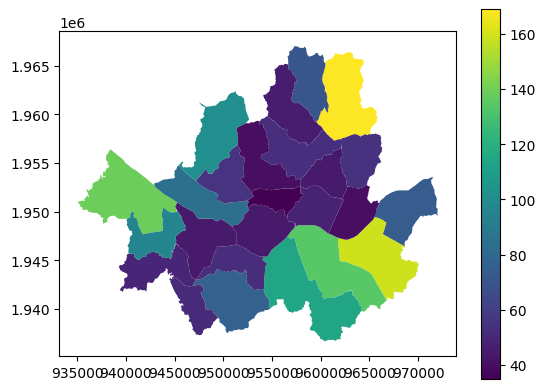

In [72]:
sj_sgg_park_cnt_gdf.plot(
    column='count',
    k=5,
    legend=True
)